# Explore here

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
df.to_csv(r"C:/Users/Usuario/OneDrive/Escritorio/4GeeksAcademy/LINEAR_REGRESSION/LINEAR_REGRESSION/data/raw/data.csv", index=False)

In [22]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:

from sklearn.preprocessing import MinMaxScaler

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [25]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [26]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv(r"C:/Users/Usuario/OneDrive/Escritorio/4GeeksAcademy/LINEAR_REGRESSION/LINEAR_REGRESSION/data/raw/data.csv", index = False)
X_test_sel.to_csv(r"C:/Users/Usuario/OneDrive/Escritorio/4GeeksAcademy/LINEAR_REGRESSION/LINEAR_REGRESSION/data/raw/data.csv", index = False)

Modelo de regresion lineal

In [27]:
train_data = pd.read_csv(r"C:/Users/Usuario/OneDrive/Escritorio/4GeeksAcademy/LINEAR_REGRESSION/LINEAR_REGRESSION/data/raw/data.csv")
test_data = pd.read_csv(r"C:/Users/Usuario/OneDrive/Escritorio/4GeeksAcademy/LINEAR_REGRESSION/LINEAR_REGRESSION/data/raw/data.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.673913,0.176352,0.0,1.0,0.120785
1,0.239130,0.259349,0.8,1.0,0.073218
2,0.717391,0.549502,0.6,1.0,0.164646
3,0.282609,0.495830,0.6,0.0,0.600564
4,0.282609,0.603444,0.4,1.0,0.053335


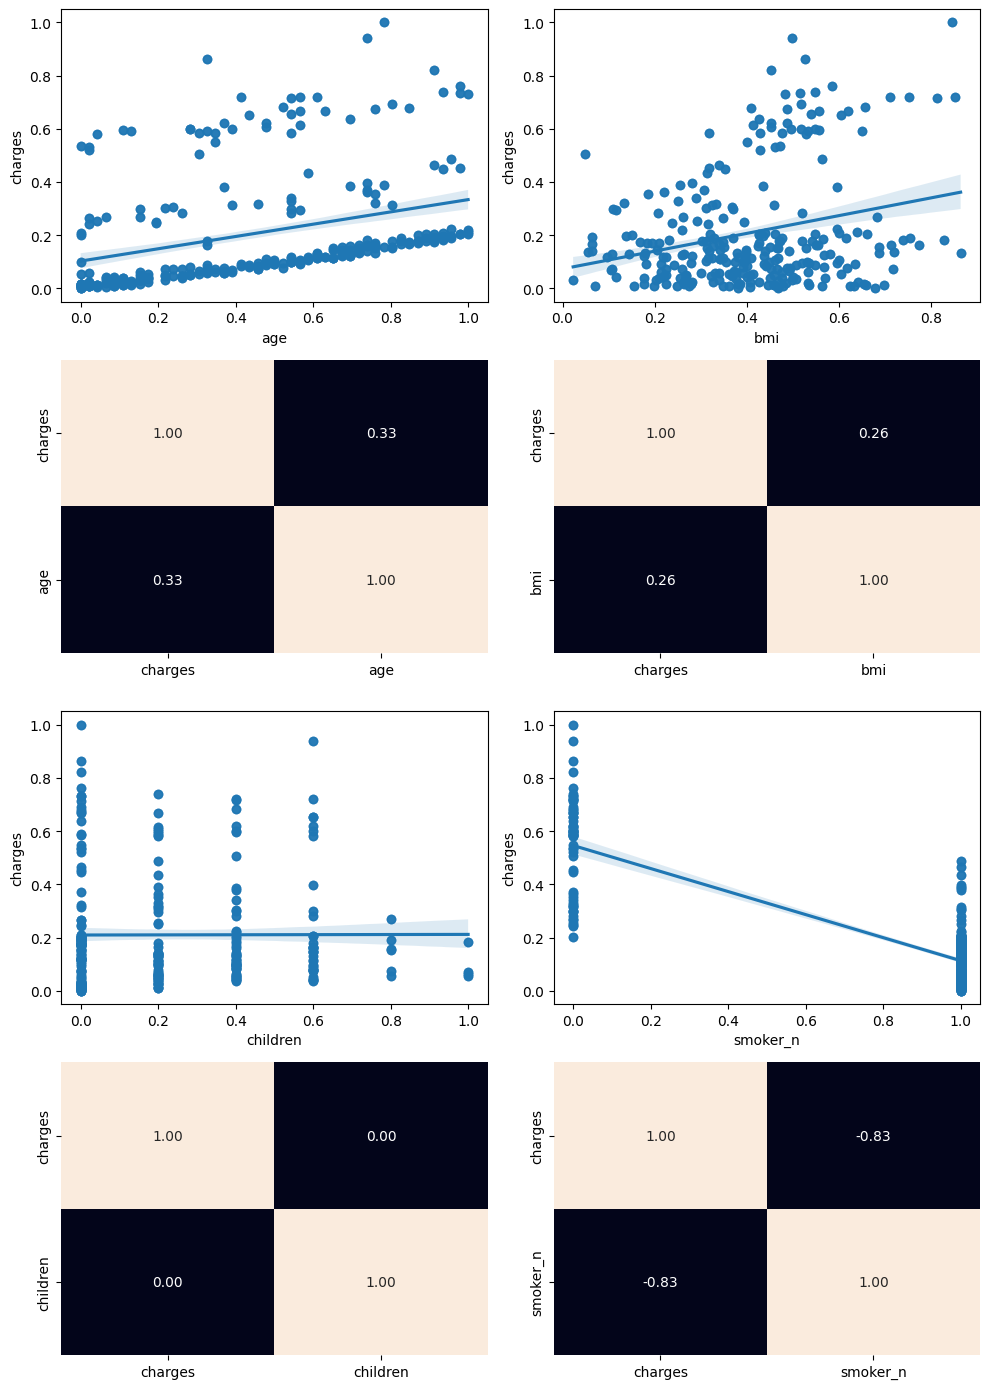

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [29]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1,b2): {model.coef_}")

Intercepto (b0): 0.3457494092105813
Coeficientes (b1,b2): [ 0.2101633   0.2171965   0.02268457 -0.42158993]


In [33]:
y_pred = model.predict(X_test)
y_pred

array([ 1.04094279e-01,  4.88932576e-02,  2.07889517e-01,  5.26446664e-01,
        1.23693128e-01,  2.00788812e-01,  4.98682399e-01, -8.83209890e-03,
        1.57912270e-01,  1.53787574e-01,  1.50592745e-01,  5.67701439e-01,
        5.17500673e-01,  2.84463390e-01,  1.40244416e-01,  1.31034023e-01,
        3.74042349e-02,  5.44949767e-01,  1.50108030e-02,  5.85973925e-02,
        3.28673202e-02,  5.03023889e-01,  2.30998818e-01,  5.18337106e-01,
        5.28634849e-01,  5.01912135e-02,  6.07109292e-01,  6.36039282e-01,
        1.56926300e-01,  1.94279201e-01,  7.18169214e-02,  1.98249600e-01,
       -2.82967151e-02,  1.83447857e-01,  6.93997700e-01,  1.86048016e-01,
        2.52724828e-02,  1.59103069e-02,  5.34522307e-01,  1.27267712e-01,
        8.17687022e-02,  4.92912417e-01,  5.90504331e-01,  1.74945693e-01,
        8.44736699e-02,  2.73454973e-02,  6.62692136e-02,  1.24371567e-01,
        3.26712612e-02,  1.24891133e-01,  7.84912883e-02,  1.76091232e-01,
        5.18906892e-01,  

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.00841834485985985
Coeficiente de determinación: 0.8201927755361733
